In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('heart.csv')
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [2]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

In [17]:
x = df.drop(['HeartDisease'],axis='columns')
y = df['HeartDisease']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [27]:
print(reg.score(X_train_scaled,y_train))
print(reg.score(X_test_scaled,y_test))

0.8610354223433242
0.8586956521739131


In [51]:
y_pred = reg.predict(X_test_scaled)
print(y_pred[:5])
print(y_test[:5])

[0 0 1 1 0]
668    0
30     1
377    1
535    1
807    0
Name: HeartDisease, dtype: int64


In [33]:
from sklearn.metrics import classification_report,confusion_matrix
CR = classification_report(y_test,y_pred)
print(CR)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [37]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[68,  9],
       [17, 90]], dtype=int64)

Text(70.72222222222221, 0.5, 'y_test')

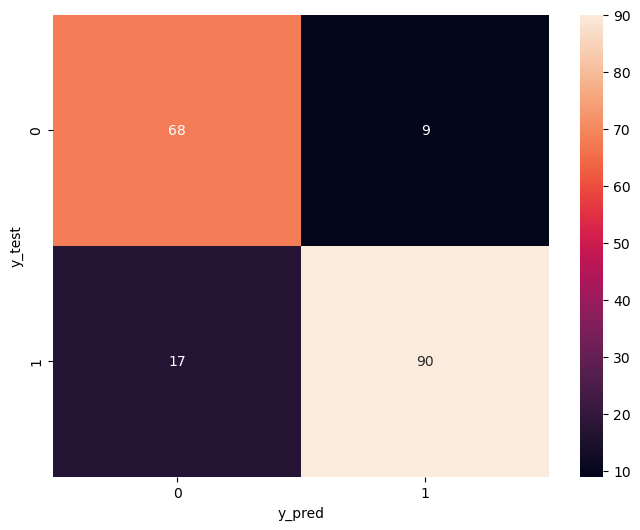

In [39]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.xlabel('y_pred')
plt.ylabel('y_test')